<a href="https://colab.research.google.com/github/Bosy-Ayman/Machine_Learning/blob/main/Assignment(3)_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [3]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [4]:
# bonus
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))

    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [5]:
# bonus
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size

    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [7]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [8]:
!pip install keras

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
# unlike the Medium article, I am not encapsulating this process in a separate class
# I think it is nice just like this
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 40
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)

        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)

    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/40, error=0.072425
2/40, error=0.035626
3/40, error=0.022942
4/40, error=0.017749
5/40, error=0.014505
6/40, error=0.012237
7/40, error=0.010463
8/40, error=0.009027
9/40, error=0.007916
10/40, error=0.007010
11/40, error=0.006249
12/40, error=0.005612
13/40, error=0.005068
14/40, error=0.004596
15/40, error=0.004188
16/40, error=0.003818
17/40, error=0.003471
18/40, error=0.003124
19/40, error=0.002900
20/40, error=0.002700
21/40, error=0.002511
22/40, error=0.002336
23/40, error=0.002195
24/40, error=0.002082
25/40, error=0.001979
26/40, error=0.001884
27/40, error=0.001801
28/40, error=0.001730
29/40, error=0.001665
30/40, error=0.001613
31/40, error=0.001576
32/40, error=0.001548
33/40, error=0.001523
34/40, error=0.001503
35/40, error=0.001484
36/40, error=0.001468
37/40, error=0.001452
38/40, error=0.001437
39/40, error=0.001422
40/40, error=0.001406


In [13]:
# Test the model on the MNIST dataset
def test_model(network, x_test, y_test):
    correct_predictions = 0
    total_samples = len(x_test)
    confusion_matrix = np.zeros((10, 10), dtype=int)  # Initialize confusion matrix

    for i in range(total_samples):
        input_data = x_test[i]
        true_label = np.argmax(y_test[i])

        # Perform prediction
        predicted_output = predict(network, input_data)
        predicted_label = np.argmax(predicted_output)

        # Update confusion matrix
        confusion_matrix[true_label][predicted_label] += 1

        # Check if prediction is correct
        if predicted_label == true_label:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / total_samples
    return accuracy, confusion_matrix

# Testing the model
accuracy, confusion_matrix = test_model(network, x_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy: 87.05%
Confusion Matrix:
[[ 932    0   21    2    0    6    6    8    5    0]
 [   0 1100    2    2    0    2    4    2   23    0]
 [   7    6  915   12   11    3   20   17   35    6]
 [   5    1   34  772    2  129    3   26   29    9]
 [   2    1    8    4  854    0   16    8   13   76]
 [  14    3    8   18   25  742   19   18   28   17]
 [  11    3   32    0   15   40  849    0    8    0]
 [   2    6   30   18    9    2    1  920    2   38]
 [  16    6    9   17   15   41   27   25  784   34]
 [  11    3   12   12   43   20    0   68    3  837]]


In [11]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.87
mse: 0.0193


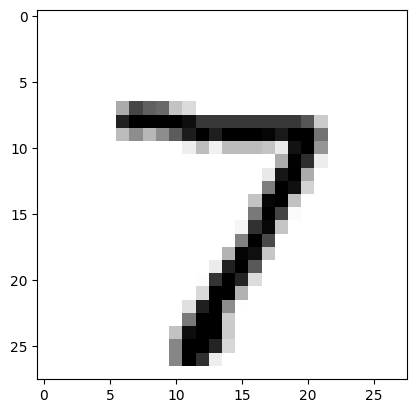

pred: 7, prob: 1.00, true: 7


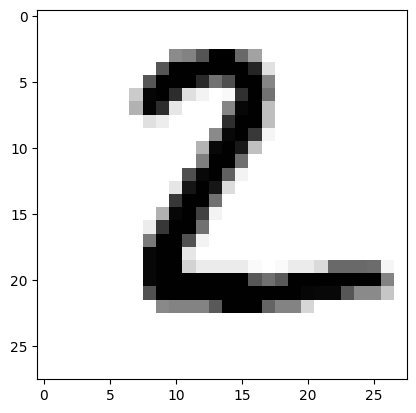

pred: 2, prob: 0.46, true: 2


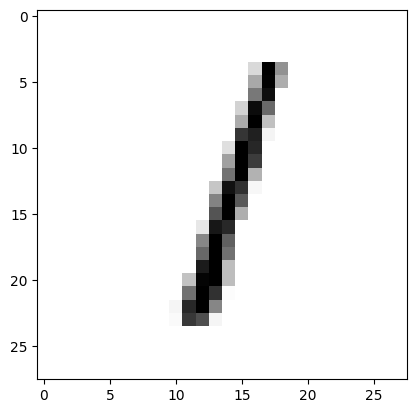

pred: 1, prob: 0.99, true: 1


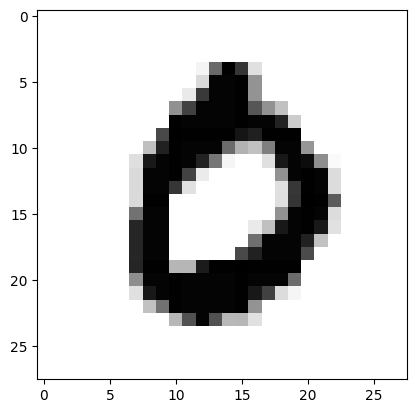

pred: 0, prob: 1.00, true: 0


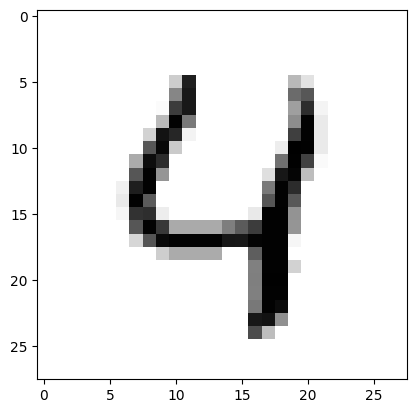

pred: 4, prob: 0.98, true: 4


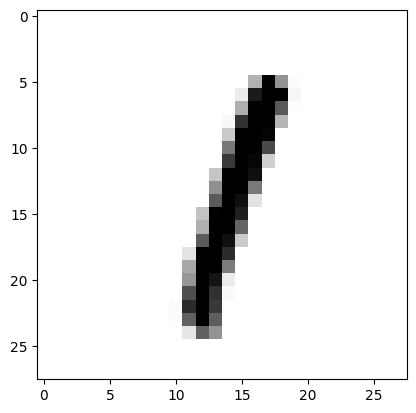

pred: 1, prob: 0.99, true: 1


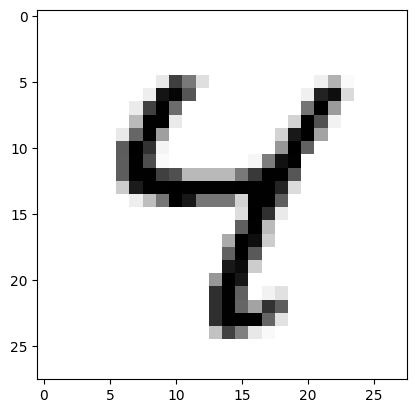

pred: 4, prob: 0.97, true: 4


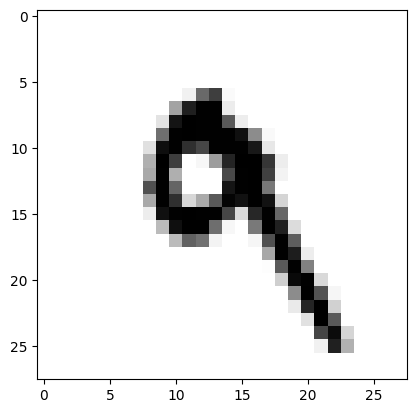

pred: 9, prob: 0.99, true: 9


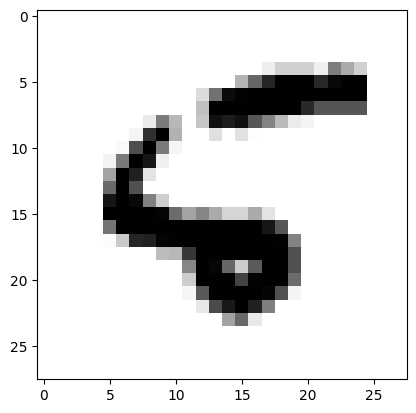

pred: 2, prob: 0.67, true: 5


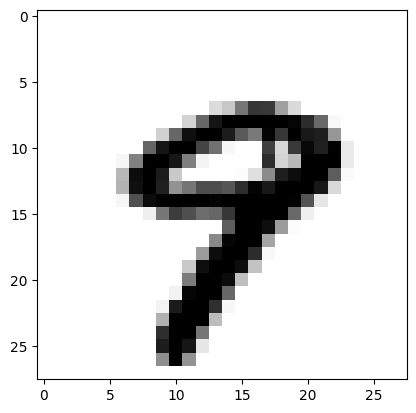

pred: 9, prob: 0.89, true: 9


In [12]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))